#### 可以比较直方图均衡化和Homomorphic Filtering的区别

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def homomorphic_filter(img, gamma_l, gamma_h, c, d0):
    # 对输入图像进行对数变换
    gray_img = img.astype('float') / 255.0
    img_log = np.log(gray_img + 1.0)

    # 计算图像的傅里叶变换
    img_fft = np.fft.fft2(img_log)

    # 计算频率域中每个点的距离
    u, v = np.meshgrid(np.arange(img_fft.shape[1]), np.arange(img_fft.shape[0]))
    d_uv = np.sqrt((u - img_fft.shape[1]/2)**2 + (v - img_fft.shape[0]/2)**2)

    # 计算同态滤波器函数
    h_uv = (gamma_h - gamma_l) * (1 - np.exp(-c * (d_uv**2 / d0**2))) + gamma_l

    # 将滤波器函数应用于频率域图像
    img_fft_filt = h_uv * img_fft

    # 计算滤波后的图像，并进行逆对数变换
    img_filt = np.real(np.fft.ifft2(np.exp(np.fft.ifftshift(img_fft_filt))))
    img_filt = np.uint8(np.round(np.expm1(img_filt) * 255))

    return img_filt



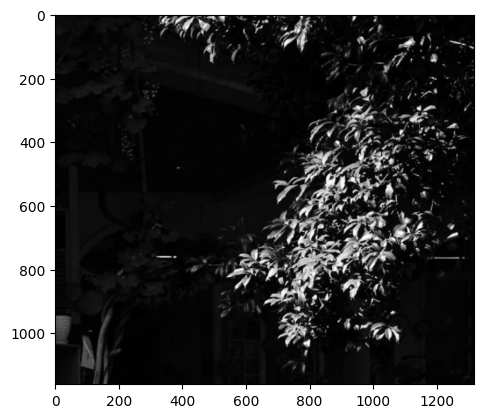

In [31]:
# 加载灰度图像
img_gray = cv2.imread("./HF.jpg", 0)
plt.imshow(img_gray,cmap='gray')

/home/shannon/miniconda3/envs/Vision/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


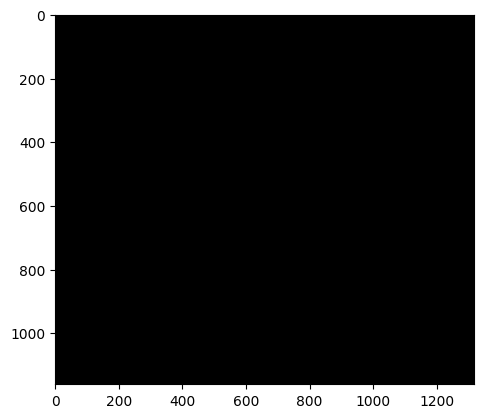

In [32]:
# 对灰度图像进行同态滤波
img_filt = homomorphic_filter(img_gray, gamma_l=0.5, gamma_h=2, c=10, d0=100)
plt.imshow(img_filt,cmap='gray')

In [33]:
img_filt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)